In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
file_path = 'Ship_Performance_Dataset.csv'
df = pd.read_csv(file_path)

In [28]:
print("Dataset Info:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency

In [29]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64


In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

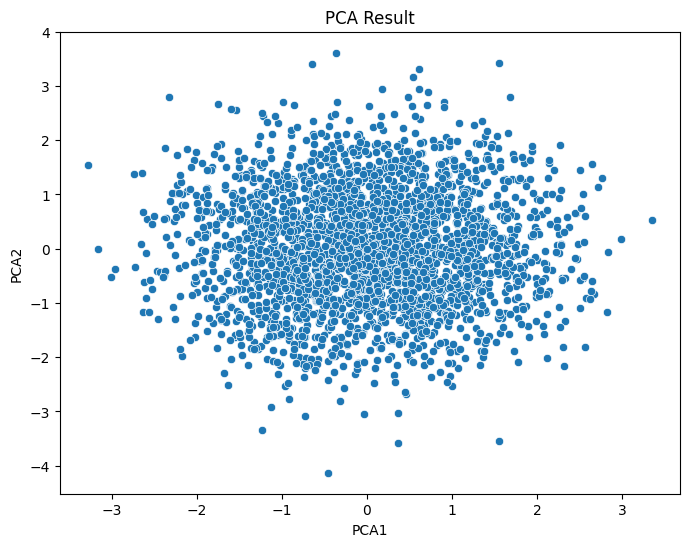

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'])
plt.title('PCA Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [33]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

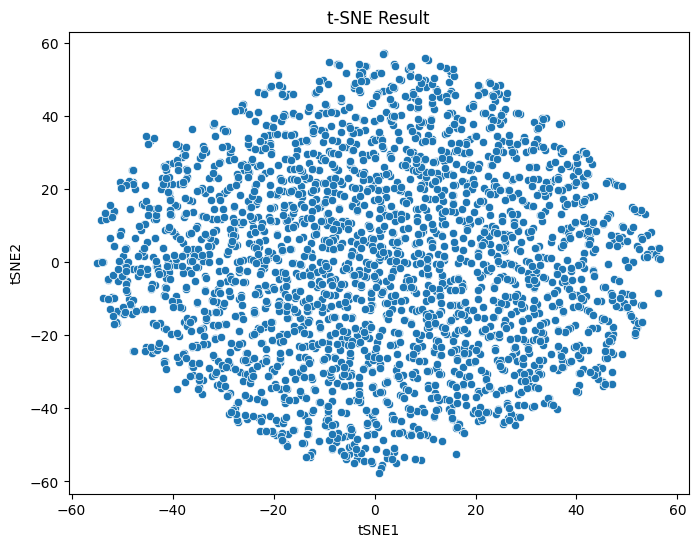

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['tSNE1'], y=df['tSNE2'])
plt.title('t-SNE Result')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

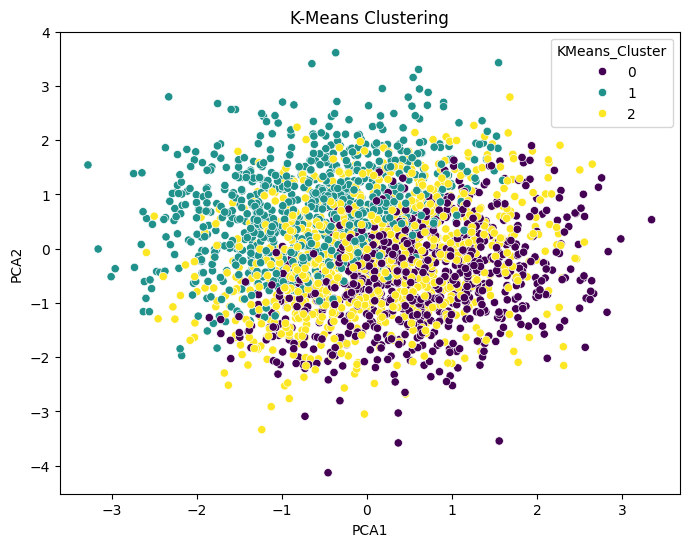

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [37]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

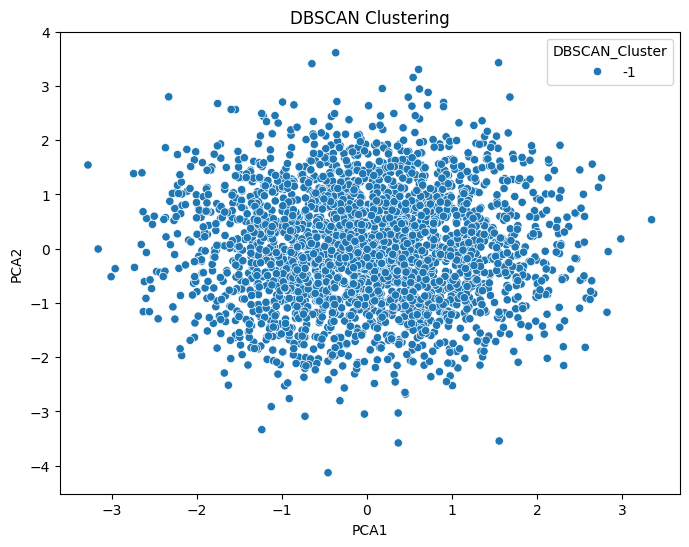

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [39]:
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(data_scaled)

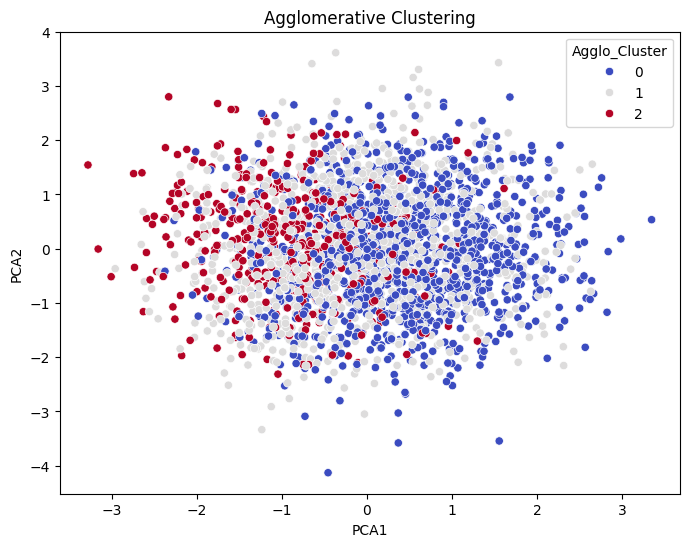

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Agglo_Cluster'], palette='coolwarm')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

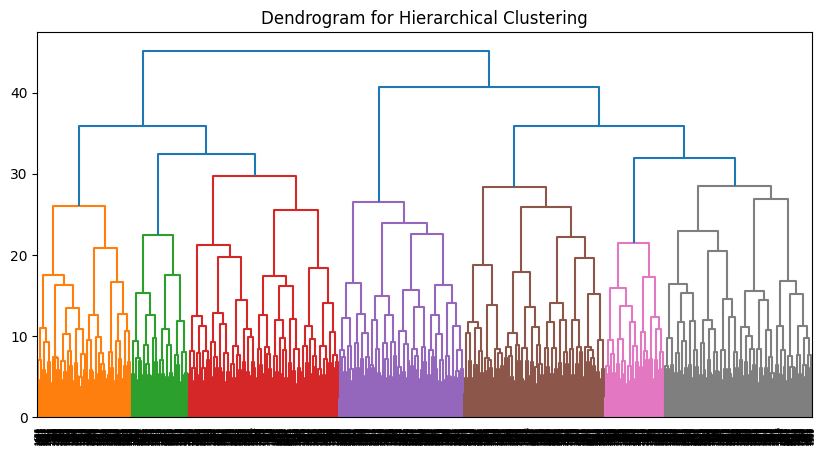

In [41]:
plt.figure(figsize=(10,5))
Z = linkage(data_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

Berdasarkan hasil analisis clustering dan dimensionality reduction pada Ship Performance Dataset, ditemukan bahwa kapal dapat dikelompokkan berdasarkan karakteristik performanya. Hasil K-Means clustering menunjukkan adanya tiga kelompok utama, yang mengindikasikan bahwa kapal dengan karakteristik serupa cenderung berada dalam kelompok yang sama. PCA membantu mengidentifikasi dua komponen utama yang merangkum sebagian besar variabilitas dalam data, memungkinkan pemetaan kapal berdasarkan performanya dalam dua dimensi. Visualisasi dengan t-SNE lebih lanjut mengonfirmasi bahwa ada beberapa kelompok kapal dengan pola performa yang khas.

Selain itu, DBSCAN berhasil mengidentifikasi beberapa kapal sebagai outlier, yang mungkin menunjukkan perbedaan signifikan dalam efisiensi bahan bakar, kecepatan, atau faktor performa lainnya. Sementara itu, Agglomerative Clustering dan analisis dendrogram menunjukkan keterkaitan hierarkis antar kapal, di mana beberapa kapal memiliki performa yang lebih mirip satu sama lain dibandingkan dengan kelompok lainnya.

Dari hasil ini, dapat disimpulkan bahwa metode clustering dapat digunakan untuk mengelompokkan kapal berdasarkan efisiensi dan performanya, yang dapat membantu dalam pengelolaan armada, pemeliharaan preventif, atau bahkan dalam pengambilan keputusan untuk optimalisasi bahan bakar. Kapal yang termasuk dalam cluster yang sama kemungkinan memiliki karakteristik operasional serupa, sedangkan kapal yang berada di luar kelompok utama dapat menjadi fokus untuk analisis lebih lanjut, seperti deteksi anomali atau peluang peningkatan performa.